# Análise temporal dos dados de Covid do estado de São Paulo

In [224]:
#Importando as bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

In [225]:
#Pegando os dados 
dados_covid = pd.read_csv('./Data/casos-brasil.csv')

In [226]:
#Vendo o head dos dados 
dados_covid.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [227]:
#Separando apenas os dados dos estados 
df_states = dados_covid[dados_covid['estado'] != 'TOTAL']

#Vendo os dados dos estados
df_states.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [228]:
#Vendo os tipos dos dados 
df_states.dtypes

semana                int64
data                 object
pais                 object
estado               object
cidade               object
novosObitos           int64
Obitos                int64
novosCasos            int64
Casos                 int64
obitosMS              int64
casosMS               int64
obitos_por_100k     float64
casos_por_100k      float64
obitos_por_casos    float64
recuperados         float64
suspeitos           float64
testes              float64
testes_por_100k     float64
dtype: object

In [229]:
#Mudando a coluna de data 
df_states['data'] = pd.to_datetime(df_states['data'])

#Vendo novamento os dados
df_states.dtypes

C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/2591085205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states['data'] = pd.to_datetime(df_states['data'])


semana                       int64
data                datetime64[ns]
pais                        object
estado                      object
cidade                      object
novosObitos                  int64
Obitos                       int64
novosCasos                   int64
Casos                        int64
obitosMS                     int64
casosMS                      int64
obitos_por_100k            float64
casos_por_100k             float64
obitos_por_casos           float64
recuperados                float64
suspeitos                  float64
testes                     float64
testes_por_100k            float64
dtype: object

In [230]:
#Vendo se há valores missing dentro dos dados
df_states.isnull().sum()

semana                 0
data                   0
pais                   0
estado                 0
cidade                 0
novosObitos            0
Obitos                 0
novosCasos             0
Casos                  0
obitosMS               0
casosMS                0
obitos_por_100k        0
casos_por_100k         0
obitos_por_casos       0
recuperados          695
suspeitos            772
testes              1283
testes_por_100k     1283
dtype: int64

Text(0.5, 0, 'Data')

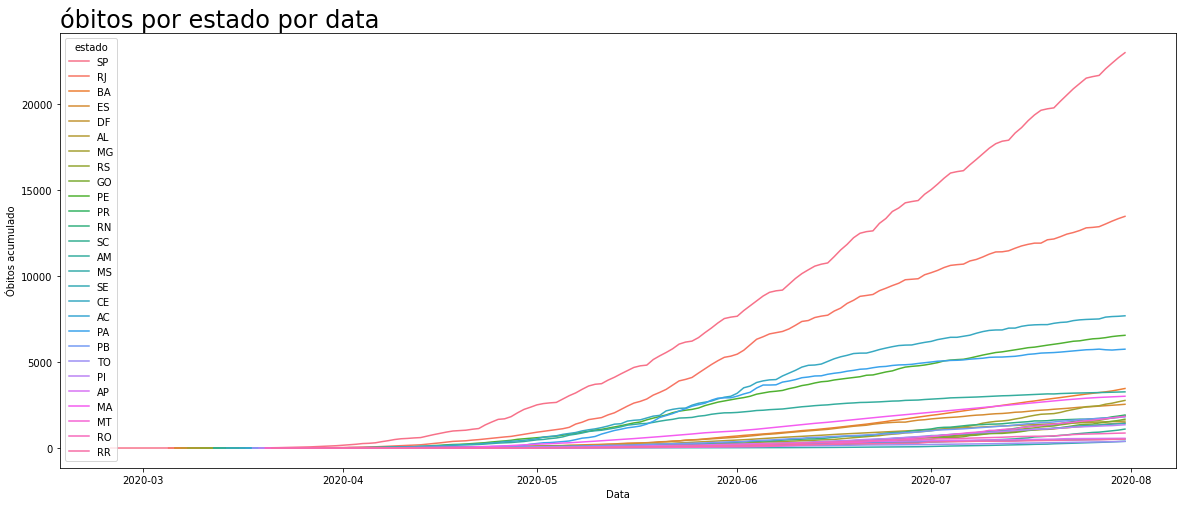

In [231]:
#Plotando o gráfico da quantidade de casos entre os estados
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_states, x='data',y='Obitos',hue='estado')
fig.set_title("óbitos por estado por data", loc='left', fontsize=24)
fig.set_ylabel("Óbitos acumulado")
fig.set_xlabel("Data")


In [232]:
#Puxando apenas o estado de SP
df_sp = df_states[df_states['estado'] == 'SP']

#Vendo os dados
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


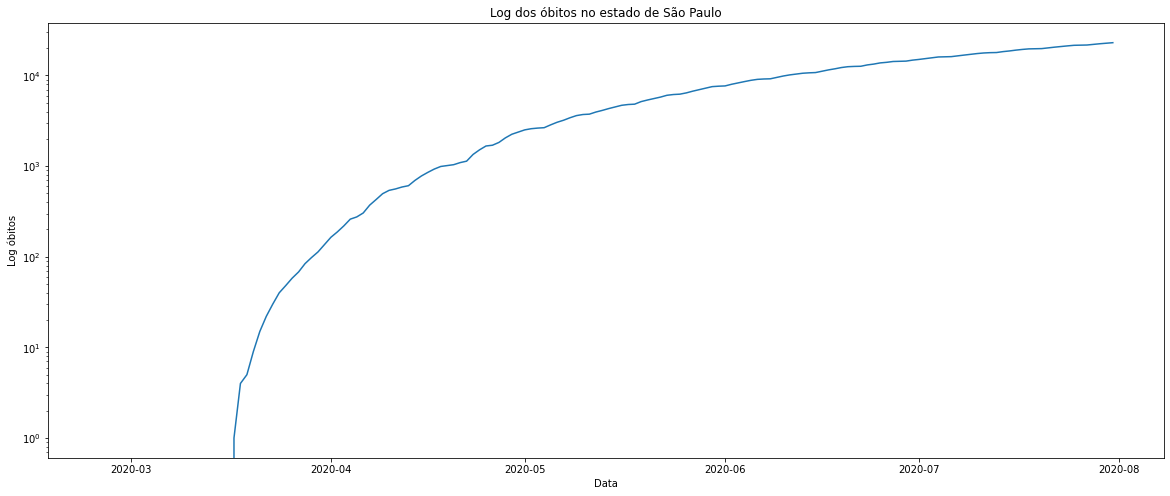

In [233]:
#Vendo se os dados são dados exponenciais aplicando o logarítmo do sns
#Criando a figura
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_sp, x='data', y='Obitos')
fig.set_title("Log dos óbitos no estado de São Paulo")
fig.set_xlabel("Data")
fig.set_ylabel("Log óbitos")
fig.set_yscale('log')

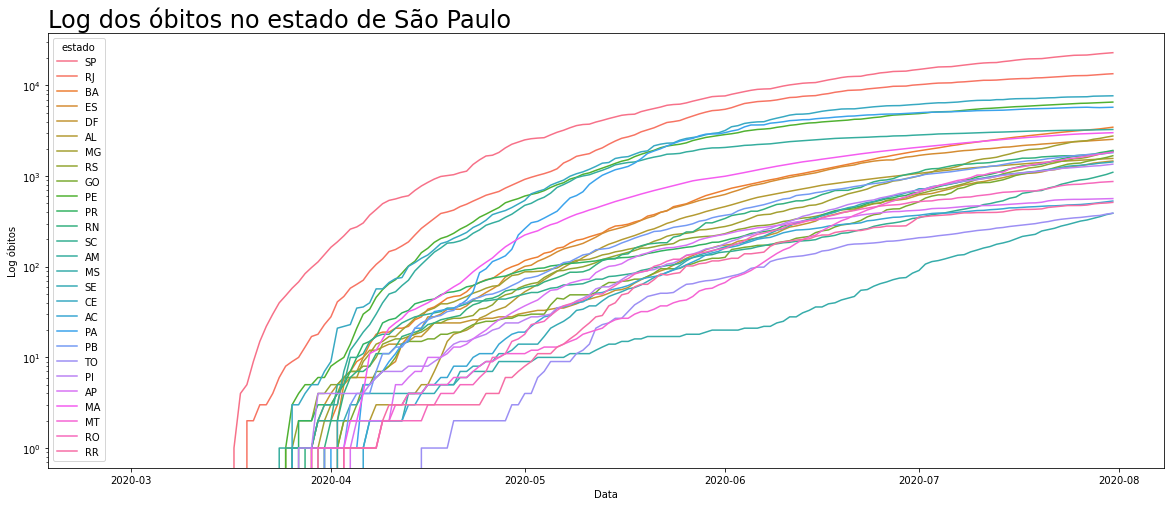

In [234]:
#Aplicando o logaritmo em todos os estados para validar 
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_states, x='data', y='Obitos', hue='estado')
fig.set_title("Log dos óbitos no estado de São Paulo", loc='left', fontsize=24)
fig.set_xlabel("Data")
fig.set_ylabel("Log óbitos")
fig.set_yscale('log')

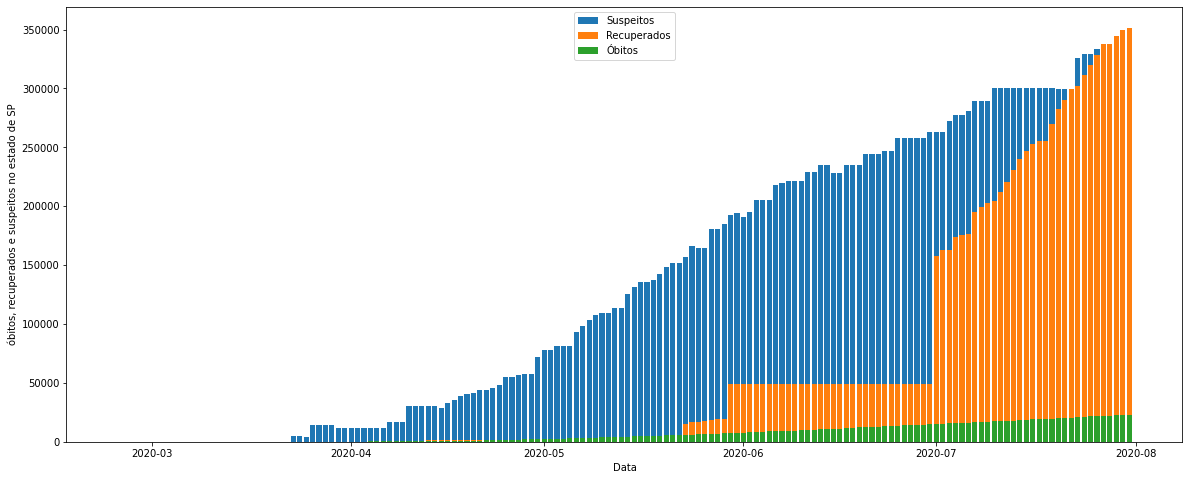

In [235]:
#Analisando os dados de recuperados com os de óbito no estado de SP 
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp['data'], df_sp['suspeitos'], label='Suspeitos')
plt.bar(df_sp['data'], df_sp['recuperados'], label="Recuperados")
plt.bar(df_sp['data'], df_sp['Obitos'], label='Óbitos')
plt.xlabel("Data")
plt.ylabel("óbitos, recuperados e suspeitos no estado de SP", rotation=90)
plt.legend()
plt.show()

In [236]:
#Criando as funções para facilitar a criação de gráfico e a análise exploratória
def plotar_lineplot(titulo, xlabel, ylabel, x,y,dataset,hue):
    fig = sns.lineplot(data=dataset, x=x,y=y,hue=hue)
    fig.figure.set_size_inches(12,6)
    fig.set_title(titulo, loc='left', fontsize=20)
    fig.set_xlabel(xlabel, fontsize=20)
    fig.set_ylabel(ylabel, fontsize=20, rotation=90)

In [237]:
#Criando a função para o gráfico de barras
def plotar_bars(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)

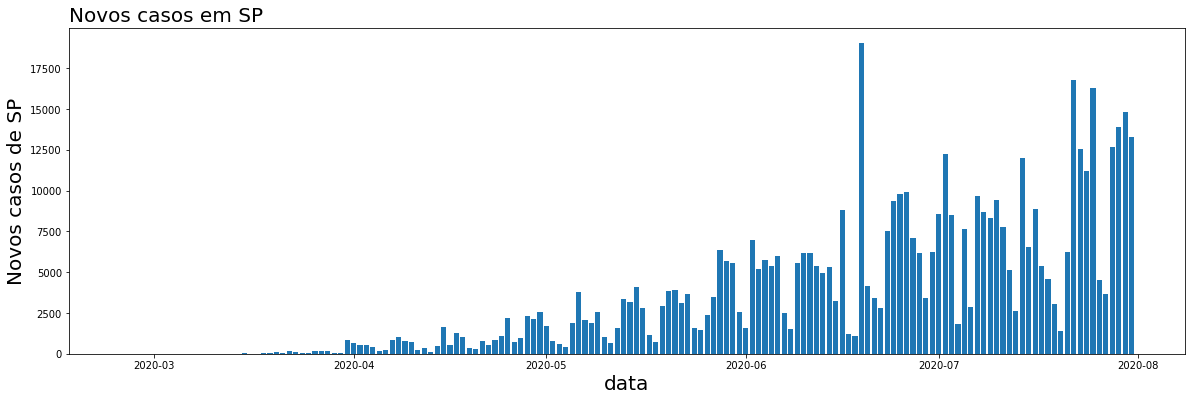

In [238]:
#Usando a função para mostar os novos casos de SP 
plotar_bars('Novos casos em SP', 'data', 'Novos casos de SP','data','novosCasos',df_sp)

In [239]:
#Calculando a acelaração de novos casos e óbitos

#Criando as novas colunas com a função diff 
df_sp['aceleracao_obitos'] = df_sp['novosObitos'].diff()
df_sp['aceleracao_novoscasos'] = df_sp['novosCasos'].diff()

#Verificando a função 
df_sp.head()

C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/1850169522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracao_obitos'] = df_sp['novosObitos'].diff()
C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/1850169522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracao_novoscasos'] = df_sp['novosCasos'].diff()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracao_obitos,aceleracao_novoscasos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,-1.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,1.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,-1.0


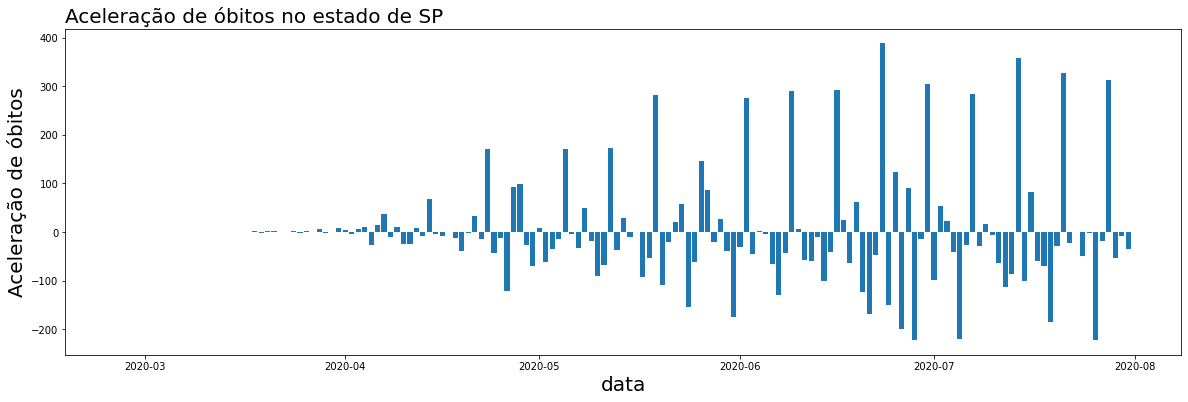

In [240]:
#Plotando o gráfico de barras com a visualização da aceleração dos óbitos
plotar_bars('Aceleração de óbitos no estado de SP','data','Aceleração de óbitos','data','aceleracao_obitos',df_sp)

In [241]:
#Criando as funções de média móvel para conseguir visualizar a aceleração de óbitos 
df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(window=7, center=False).mean()

#Pegando a média de 14 dias pois é o número em que a pessoa fica de quarentena na maioria dos casos
df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(window=14, center=False).mean()

C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/2143328706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(window=7, center=False).mean()
C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/2143328706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(window=14, center=False).mean()


<BarContainer object of 158 artists>

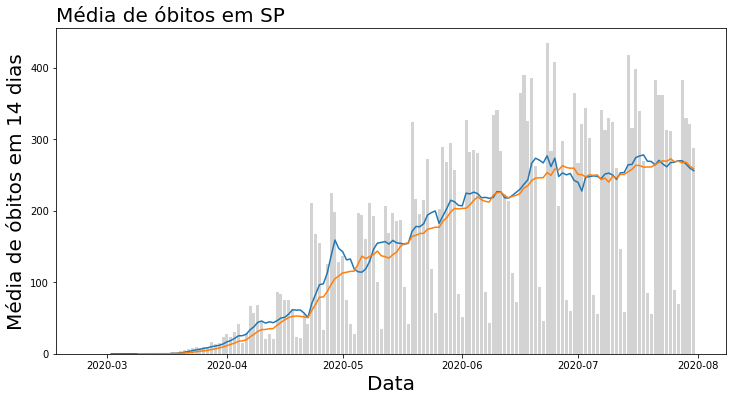

In [242]:
#Plotando a linha média 
plotar_lineplot('Média de óbitos em SP','Data','Média de óbitos em 7 dias','data','mediaObitos',df_sp,None)
plotar_lineplot('Média de óbitos em SP','Data','Média de óbitos em 14 dias','data','mediaObitos_14',df_sp,None)

#Colocando o gráfico de barras para validar 
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

In [243]:
#Verificando a autocorelação nos casos de óbitos 

#Importando o gráfico de autocorelação 
from pandas.plotting import autocorrelation_plot

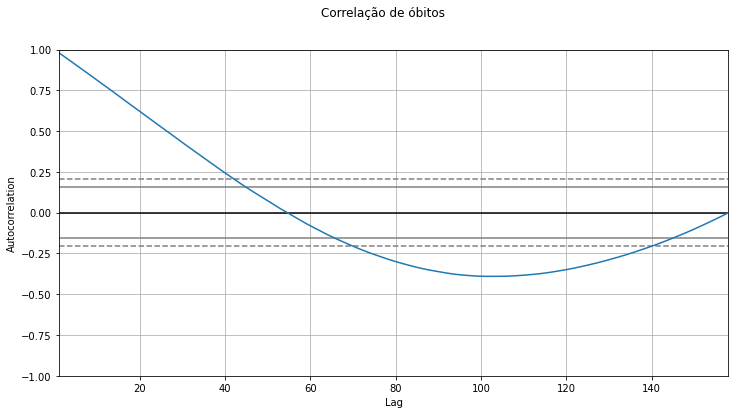

In [244]:
#Fazendo o gráfico com os óbitos
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação de óbitos")
autocorrelation_plot(df_sp['Obitos'])
ax=ax

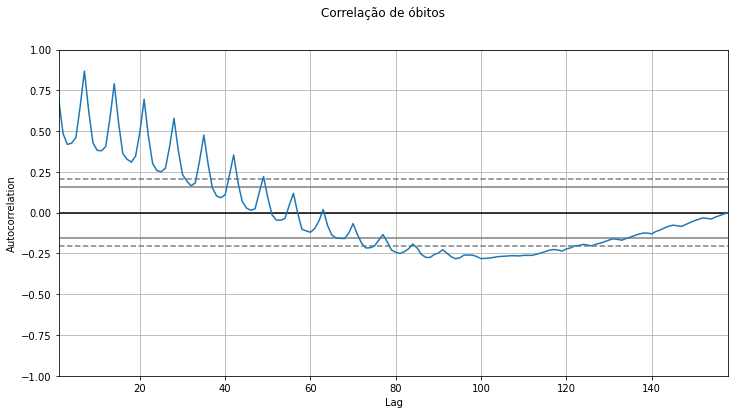

In [245]:
#Vendo a autocorrelação entre os dias para verificar o aumento de lag por semana
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação de óbitos")
autocorrelation_plot(df_sp['novosObitos'])
ax=ax

In [246]:
#Verificando a sazonalidade dos dias da semana com o cadastro de óbitos no período
#Pegando o mês 
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['weekday'] = df_sp['mes'].dt.day_name()

#vendo o df
df_sp.head()

C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/3426484083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mes'] = pd.to_datetime(df_sp['data'])
C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/3426484083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['weekday'] = df_sp['mes'].dt.day_name()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracao_obitos,aceleracao_novoscasos,mediaObitos,mediaObitos_14,mes,weekday
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN,2020-02-29,Saturday


In [247]:
#Criando o groupbay com o dia da semana 
dias_agrupados = df_sp.groupby(['weekday'])['Obitos','novosObitos','aceleracao_obitos'].mean().round()
dias_agrupados['dias_da_semana'] = dias_agrupados.index

#Vendo os dados 
dias_agrupados

C:\Users\pedro\AppData\Local\Temp/ipykernel_6988/2275736343.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dias_agrupados = df_sp.groupby(['weekday'])['Obitos','novosObitos','aceleracao_obitos'].mean().round()


,Obitos,novosObitos,aceleracao_obitos,dias_da_semana
weekday,,,,
Friday,7342.0,177.0,-13.0,Friday
Monday,6887.0,41.0,-20.0,Monday
Saturday,6786.0,155.0,-17.0,Saturday
Sunday,6846.0,60.0,-95.0,Sunday
Thursday,7165.0,190.0,9.0,Thursday
Tuesday,6794.0,206.0,175.0,Tuesday
Wednesday,6975.0,181.0,-25.0,Wednesday


In [248]:
#reorganizando o df agrupado 
dias_agrupados = dias_agrupados.reindex(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

#Vendo os dados
dias_agrupados.head(7)

,Obitos,novosObitos,aceleracao_obitos,dias_da_semana
weekday,,,,
Sunday,6846.0,60.0,-95.0,Sunday
Monday,6887.0,41.0,-20.0,Monday
Tuesday,6794.0,206.0,175.0,Tuesday
Wednesday,6975.0,181.0,-25.0,Wednesday
Thursday,7165.0,190.0,9.0,Thursday
Friday,7342.0,177.0,-13.0,Friday
Saturday,6786.0,155.0,-17.0,Saturday


C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dias_da_semana', ylabel='novosObitos'>

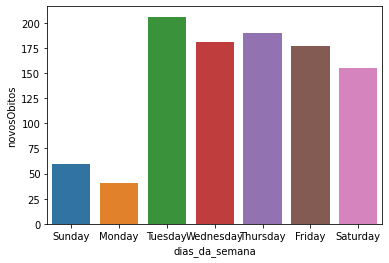

In [249]:
#Plotando os dados 
sns.barplot(dias_agrupados['dias_da_semana'],dias_agrupados['novosObitos'])

In [250]:
#Criando a função para adicionar detalhamento nas datas com o datetime
def create_datetime_features(df, label=None):
    df = df.copy()
    df['Diasemana'] = df['mes'].dt.dayofweek
    df['Mes'] = df['mes'].dt.month
    df['Diames'] = df['mes'].dt.day

    X = df[['Diasemana','Mes','Diames']]

    if label:
        y = df[label]
        return X,y
    return X

In [251]:
#Usando a def para criar a variável 
X,y = create_datetime_features(df_sp,label='Obitos')

df_final_dates = pd.concat([X,y], axis=1)

df_final_dates.head()

,Diasemana,Mes,Diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0


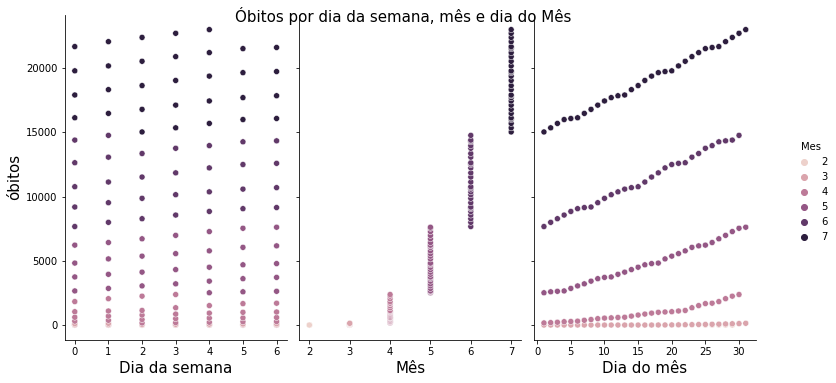

In [252]:
#Plotando as 3 variáveis com o seaborn
figure = sns.pairplot(df_final_dates.dropna(), hue='Mes',x_vars=['Diasemana','Mes','Diames'],y_vars='Obitos')

figure.fig.set_size_inches(12,6)
figure.axes[0,0].set_xlabel("Dia da semana", fontsize=15)
figure.axes[0,1].set_xlabel("Mês", fontsize=15)
figure.axes[0,2].set_xlabel("Dia do mês", fontsize=15)
figure.axes[0,0].set_ylabel("óbitos", fontsize=15)

plt.suptitle("Óbitos por dia da semana, mês e dia do Mês", fontsize=15)
plt.show()

## Fazendo um estudo para a utilização do modelo ARIMA para realizar a predição de novos casos da Covid-19

In [253]:
#Salvar só os casos de São Paulo 
#Colocano o index como data 
df_sp.index = pd.to_datetime(df_sp['data'])

y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [254]:
#IMportando a biblioteca 
from statsmodels.tsa.stattools import adfuller

In [255]:
#Fazendo o teste adfuller com os casos
adfuller(y.dropna())

(1.3664743612803494,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

In [256]:
#Printando o valor de P para visualizar se é uma série estacionaária 
print("Valor P: {}".format(adfuller(y.dropna())[1]))

Valor P: 0.9969563888815705


In [257]:
#A série não é uma time series estacionária

In [258]:
#Importando as bibliotecas para plotar a diferenciação e ACF 
from statsmodels.graphics.tsaplots import plot_acf,plot_acf

In [259]:
#Criando a função para plotar a ACF 
def plot_ACF(y1,y2,y3):
    #Criando a figurta 
    fig = plt.figure(figsize=(10,10))

    #Criando os subplots
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title="Original")
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title="1º diferenciação")
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title="2º diferenciação")

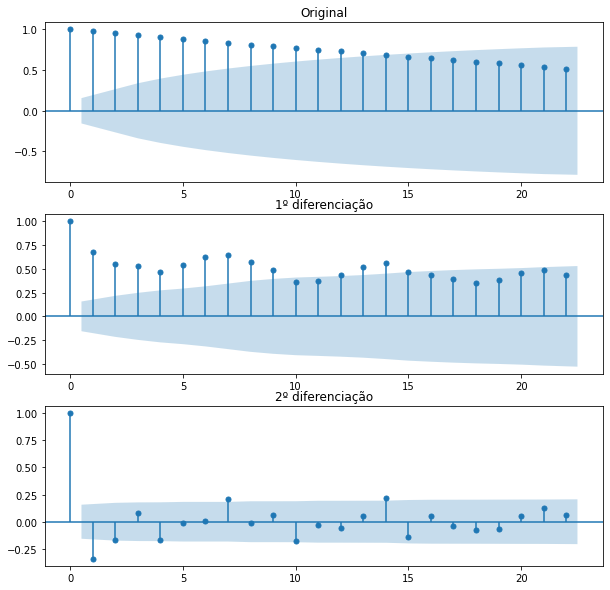

In [260]:
#Utilizando a função com parâmetros 
plot_ACF(y, y.diff().dropna(), y.diff().diff().dropna())

## Parâmetros para o modelo ARIMA

### Iremos utilizar o seguintes parâmetros para o modelo ARIMA 
### P =  1
### D = 1 (A segunda diferenciação pode ser considerada como um uso desnecessário da diferenciação dos dados)
### Q = 1

In [261]:
#Importando a biblioteca com o modelo ARIMA 
from statsmodels.tsa.arima_model import ARIMA

In [262]:
#Pegando o modelo 
modelo = ARIMA(y, order=(1,1,1))

#Treinando o modelo 
modelo_fit = modelo.fit(disp=0)

C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequ

In [263]:
#Printando os dados do modelo 
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.919
Method:                       css-mle   S.D. of innovations           2588.967
Date:                Thu, 02 Sep 2021   AIC                           2923.837
Time:                        18:01:02   BIC                           2936.062
Sample:                    02-26-2020   HQIC                          2928.802
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5023.2939   4393.445      1.143      0.253   -3587.701    1.36e+04
ar.L1.D.Casos     0.9967      0.005    216.238      0.000       0.988       1.006
ma.L1.D.Casos    -0.8462      0.040    -

In [264]:
#Mesmo com os dados obtidos pelo ARIMA padrão nós precisamos utilizar o SARIMA 

#Como em nossos dados é encontrado a Sacionalidade (Devido ao input de dados a cada 7 dias) é necessário usar o modelo Sazional do ARIMA 
#Para encontrar os melhores parâmetros para o modelo iremos testar múltiplas possibilidades e depois testar suas métricas e utilizar aquela que performou melhor

In [265]:
#Importanto itertools 
import itertools

#Colocando valores aleatórios de p,d e q de 0 a 1 
p = q = d = range(0,2)

#Criando a lista de produtos 
pdq = list(itertools.product(p,d,q))

In [266]:
#Printando o resultado 
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [267]:
#Criando o seansonal_pdq
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p,d,q))]

In [268]:
#Vendo as opções de parâmetros 
print("Exemplo de combinação de parâmetros para o modelo ARIMA Sazonal")
print("SARIMA: {} X {}".format(pdq[0], seasonal_pdq[0]))
print("SARIMA: {} X {}".format(pdq[0], seasonal_pdq[1]))
print("SARIMA: {} X {}".format(pdq[0], seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o modelo ARIMA Sazonal
SARIMA: (0, 0, 0) X (0, 0, 0, 6)
SARIMA: (0, 0, 0) X (0, 0, 1, 6)
SARIMA: (0, 0, 0) X (0, 1, 0, 6)


In [269]:
#Testando os parâmetros 

#Importanto o sm
import statsmodels.api as sm

In [270]:
#Salvando novamento os casos de SP na variável 
y = df_sp['Casos']
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [271]:
#Criando a lista para visualização de parâmetros e AIC mais fáceis 
aic_lista = []

#Fazendo o lup 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal)

        #Fit do modelo 
        results = mod.fit()

        #Append
        aic_lista.append("SAMIRA{}X{} - AIC{}".format(param, param_seasonal, results.aic))

C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Ma

In [272]:
aic_lista

['SAMIRA(0, 0, 0)X(0, 0, 0, 6) - AIC4312.204463385908',
 'SAMIRA(0, 0, 0)X(0, 0, 1, 6) - AIC4229.611825801134',
 'SAMIRA(0, 0, 0)X(0, 1, 0, 6) - AIC3541.160726482915',
 'SAMIRA(0, 0, 0)X(0, 1, 1, 6) - AIC3465.586893479747',
 'SAMIRA(0, 0, 0)X(1, 0, 0, 6) - AIC3979.300048831281',
 'SAMIRA(0, 0, 0)X(1, 0, 1, 6) - AIC3572.763157413793',
 'SAMIRA(0, 0, 0)X(1, 1, 0, 6) - AIC3131.5627445319483',
 'SAMIRA(0, 0, 0)X(1, 1, 1, 6) - AIC3126.3738314082466',
 'SAMIRA(0, 0, 1)X(0, 0, 0, 6) - AIC4203.6371531569575',
 'SAMIRA(0, 0, 1)X(0, 0, 1, 6) - AIC4183.745734492235',
 'SAMIRA(0, 0, 1)X(0, 1, 0, 6) - AIC3342.018241680411',
 'SAMIRA(0, 0, 1)X(0, 1, 1, 6) - AIC3228.107477914907',
 'SAMIRA(0, 0, 1)X(1, 0, 0, 6) - AIC4172.732147174496',
 'SAMIRA(0, 0, 1)X(1, 0, 1, 6) - AIC4174.6661866373815',
 'SAMIRA(0, 0, 1)X(1, 1, 0, 6) - AIC2353.492035602951',
 'SAMIRA(0, 0, 1)X(1, 1, 1, 6) - AIC3393.844916306956',
 'SAMIRA(0, 1, 0)X(0, 0, 0, 6) - AIC3140.724225355021',
 'SAMIRA(0, 1, 0)X(0, 0, 1, 6) - AIC3056.322

In [273]:
#Usando os parâmetros com maior performance para o modelo final 
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,7))

#Pegando o resultado 
results = mod.fit()

C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


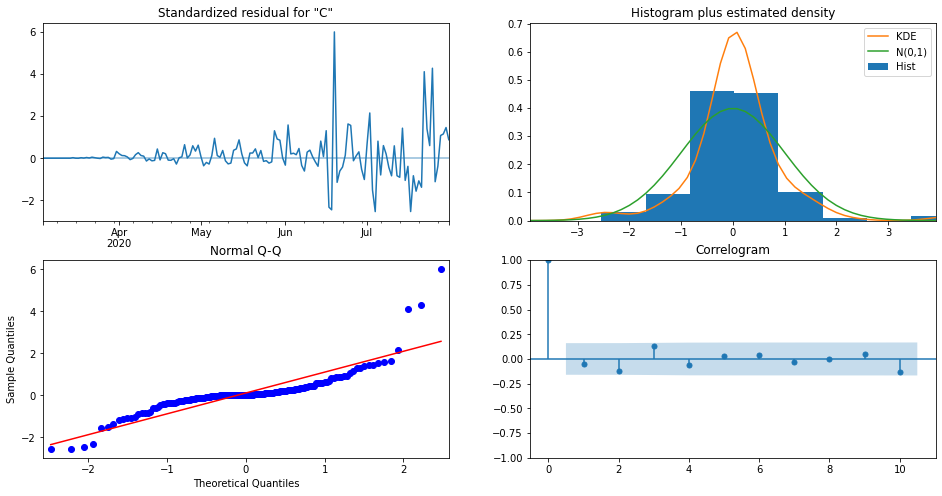

In [274]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [275]:
#Após encontrar um modelo com um bom AIC 
#Iremos testar o modelo com alguns dados que já temos, ou seja, vamos ver se os dados gerados pelo ARIMA batem com os dados de teste

In [276]:
#Pegando as predições de julho de 2020 
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)

#Pegando o intervalo de confiança
pred_ic = pred.conf_int()

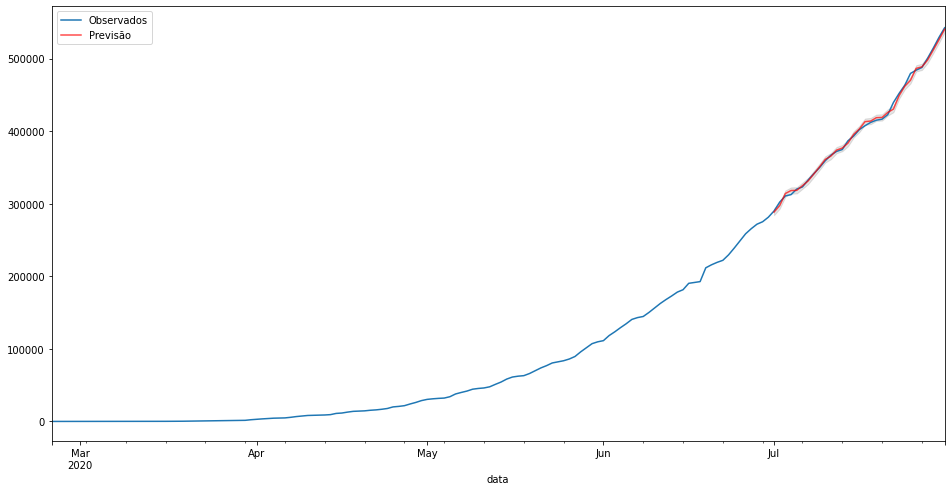

In [280]:
#Plotando o gráfico com os dados de teste e treino 
ax = y['2020':].plot(label="Observados")
pred.predicted_mean.plot(ax=ax, label="Previsão",color='r',alpha=0.7, figsize=(16,8))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
plt.legend()
plt.show()

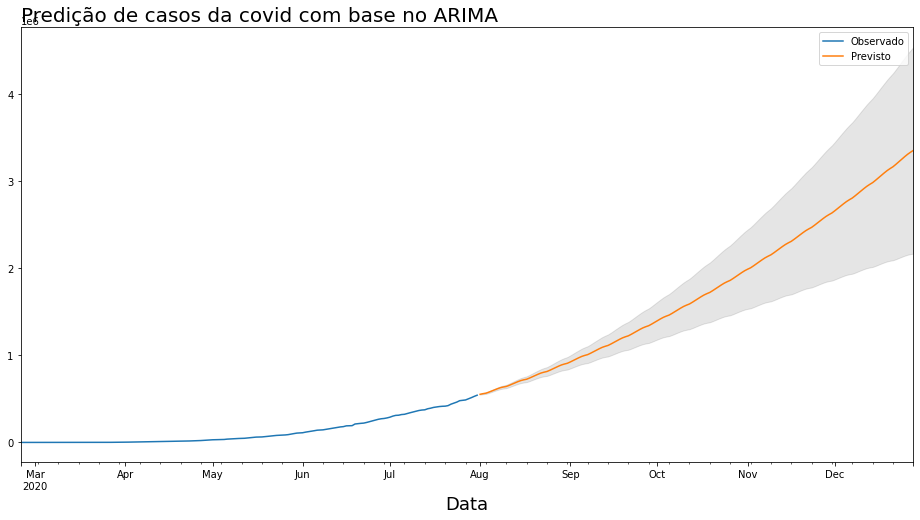

In [284]:
#Agora que nosso ARIMA conseguiu uma boa predição vamos utilizaro o modelo para fazer o forecast de casos 

#Fazendo o forecast 
pred_forecast = results.get_forecast(steps=150)
pred_ic = pred_forecast.conf_int()

#Plotando o gráfico 
ax = y.plot(label="Observado", figsize=(16,8))
pred_forecast.predicted_mean.plot(ax=ax, label="Previsto")
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
plt.title("Predição de casos da covid com base no ARIMA", loc='left', fontsize=20)
plt.xlabel("Data", fontsize=18)
plt.legend()
plt.show()